In [ ]:
! pip3 install requests pandas matplotlib --break-system-packages

In [1]:
%matplotlib inline

In [2]:
import requests
import pandas as pd
import logging
import sys

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s: %(message)s')


OPEN_WEATHER_MAP_API_KEY = "4289e978f573b53a87c2dba25d5dcbf6"
OPEN_WEATHER_MAP_ENDPOINT = "https://api.openweathermap.org/data/2.5/weather"

INPUT_CITIES = ["Berlin", "Lisbon", "Novosibirsk", "London", "Paris", "Barcelona", "New York", "Prague", "Budapest", "Belgrade"]


In [3]:
def fetch_city_weather_data(city: str) -> dict | None:
    try:
        response = requests.get(OPEN_WEATHER_MAP_ENDPOINT, params={
            "q": city,
            "appid": OPEN_WEATHER_MAP_API_KEY,
            "units": "metric"
        })
        response.raise_for_status()  # Raise error for bad responses
    except requests.exceptions.RequestException as e:
        logging.error(f"Error fetching data for {city}: {e}")
        return None

    try:
        data = response.json()
    except requests.exceptions.JSONDecodeError:
        logging.error(f"Error decoding API data for {city}: {e}")
        return None
        
    return {
        "city": data["name"],
        "temperature": data["main"]["temp"],
        "humidity": data["main"]["humidity"],
        "conditions": data["weather"][0]["main"]
    }

In [4]:
fetch_city_weather_data("Berlin") # just testing

{'city': 'Berlin', 'temperature': 9.73, 'humidity': 65, 'conditions': 'Clouds'}

In [5]:
def fetch_multiple_city_weather_data(cities: list) -> list:
    return [fetch_city_weather_data(city) for city in cities]

# Now let's do magic!

In [6]:
# Fetch weather data and convert into a dataframe

weather_data = fetch_multiple_city_weather_data(INPUT_CITIES)
weather_data_df = pd.DataFrame(weather_data)

weather_data_df

,city,temperature,humidity,conditions
0,Berlin,9.73,65,Clouds
1,Lisbon,14.76,67,Clouds
2,Novosibirsk,1.61,75,Clouds
3,London,11.71,63,Clouds
4,Paris,13.44,54,Clear
5,Barcelona,13.16,77,Clouds
6,New York,4.77,51,Clear
7,Prague,8.85,57,Clouds
8,Budapest,10.50,57,Clouds
9,Belgrade,12.53,52,Clouds


In [7]:
# Find and print highest temp, lowest humidity and most common weather condition

highest_temp_city = weather_data_df.loc[weather_data_df["temperature"].idxmax()]
lowest_humidity_city = weather_data_df.loc[weather_data_df["humidity"].idxmin()]
most_common_weather_condition = weather_data_df["conditions"].mode()[0]

print(f"Highest temp city: {highest_temp_city['city']} — {highest_temp_city['temperature']}C")
print(f"Lowest humidity city: {lowest_humidity_city['city']} — {lowest_humidity_city['humidity']}%")
print(f"Most common weather conditions: {most_common_weather_condition}")

Highest temp city: Lisbon — 14.76C
Lowest humidity city: New York — 51%
Most common weather conditions: Clouds


# Playing with data frames is fun

In [8]:
weather_data_df.sort_values(by="temperature")

,city,temperature,humidity,conditions
2,Novosibirsk,1.61,75,Clouds
6,New York,4.77,51,Clear
7,Prague,8.85,57,Clouds
0,Berlin,9.73,65,Clouds
8,Budapest,10.50,57,Clouds
3,London,11.71,63,Clouds
9,Belgrade,12.53,52,Clouds
5,Barcelona,13.16,77,Clouds
4,Paris,13.44,54,Clear
1,Lisbon,14.76,67,Clouds


In [9]:
weather_data_df[["temperature", "humidity"]].describe()

,temperature,humidity
count,10.000000,10.000000
mean,10.106000,61.800000
std,4.124181,9.211104
min,1.610000,51.000000
25%,9.070000,54.750000
50%,11.105000,60.000000
75%,13.002500,66.500000
max,14.760000,77.000000


# Finally, let's plot some charts

<Axes: >

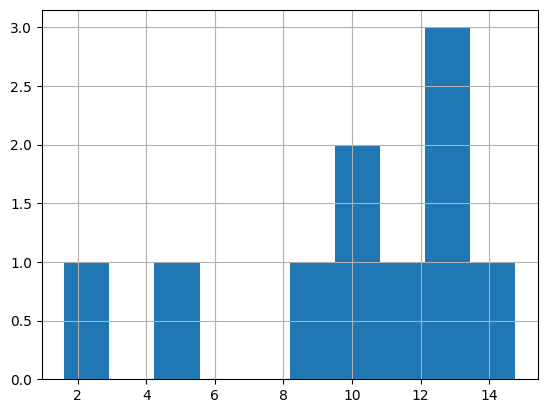

In [10]:
# Temperature histogram

weather_data_df["temperature"].hist(bins=10)

<Axes: >

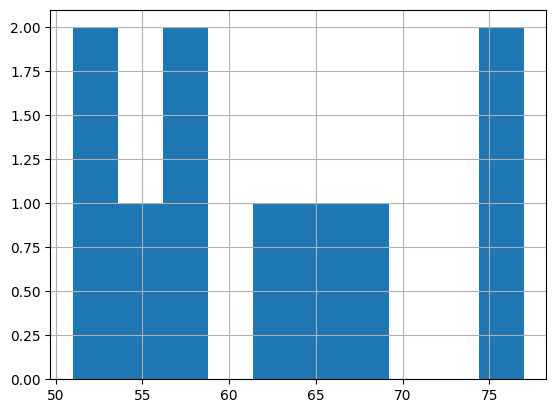

In [11]:
# Humidity histogram

weather_data_df["humidity"].hist(bins=10)

<Axes: >

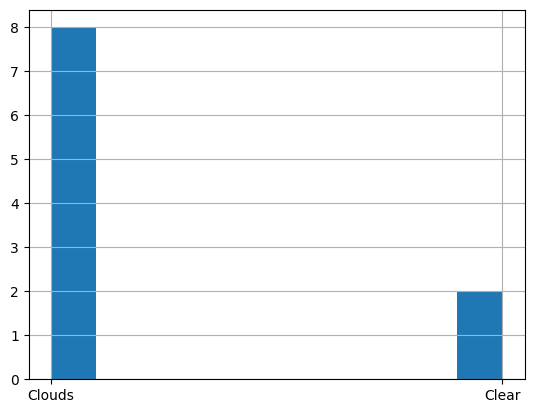

In [12]:
# Weather conditions histogram

weather_data_df["conditions"].hist(bins=10)

<Axes: xlabel='temperature', ylabel='humidity'>

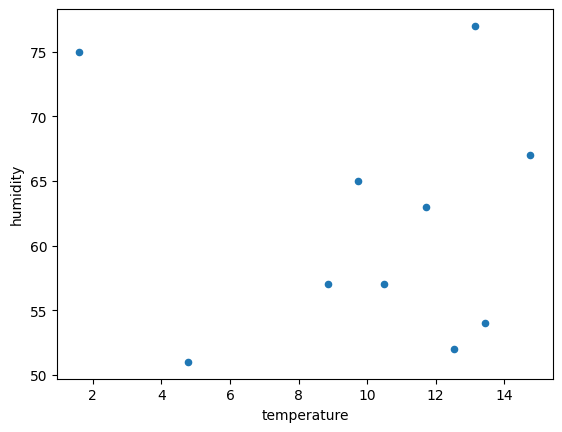

In [13]:
# Some fancier scatter plot

weather_data_df.plot.scatter(x="temperature", y="humidity")

# Voilà!